In [1]:
%matplotlib notebook
%load_ext autoreload
%pwd

'/ocean/projects/asc170022p/mtragoza/lung-project/notebooks'

In [2]:
%time
import sys, os
os.environ['PKG_CONFIG_PATH'] = '/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/pkgconfig'

sys.path.append('..')
import project

CPU times: user 1 μs, sys: 1 μs, total: 2 μs
Wall time: 3.34 μs


In [19]:
# configuration settings
data_root = '../data/Emory-4DCT'
mask_roi = 'lung_combined_mask'
mesh_radius = 20
interp_radius = 20
interp_sigma = 10
num_levels = 3
num_conv_layers = 2
conv_channels = 4
conv_kernel_size = 3
output_func = 'exp'
batch_size = 4
learning_rate = 1e-5

save_every = 10
#save_prefix = f'2024-09-28__initial/train__batch_size__{mesh_radius}__{interp_radius}__{interp_sigma}__{output_func}__{batch_size}/'
save_prefix = '2024-09-30__nb'
load_epoch = 0

In [20]:
train_images = project.imaging.Emory4DCT(data_root, phases=range(10, 100, 10))
test_images = project.imaging.Emory4DCT(data_root, phases=[0])
train_images

Emory4DCT('../data/Emory-4DCT', 10 cases)

In [21]:
train_examples = train_images.get_examples(mask_roi, mesh_radius)
test_examples = test_images.get_examples(mask_roi, mesh_radius)
len(train_examples), len(test_examples)

(90, 10)

In [22]:
train_data = project.data.Dataset(train_examples)
test_data = project.data.Dataset(test_examples)

In [23]:
model = project.model.UNet3D(
    in_channels=1,
    out_channels=1,
    num_levels=num_levels,
    num_conv_layers=num_conv_layers,
    conv_channels=conv_channels,
    conv_kernel_size=conv_kernel_size,
).cuda()

In [32]:
%autoreload
trainer = project.training.Trainer(
    model=model,
    train_data=train_data,
    test_data=test_data,
    batch_size=batch_size,
    learning_rate=learning_rate,
    interp_radius=interp_radius,
    interp_sigma=interp_sigma,
    save_every=save_every,
    save_prefix=save_prefix,
    sync_cuda=True
)

In [33]:
if load_epoch:
    trainer.load_state(epoch=load_epoch)

['case7_T00.nii'].

<IPython.core.display.Javascript object>


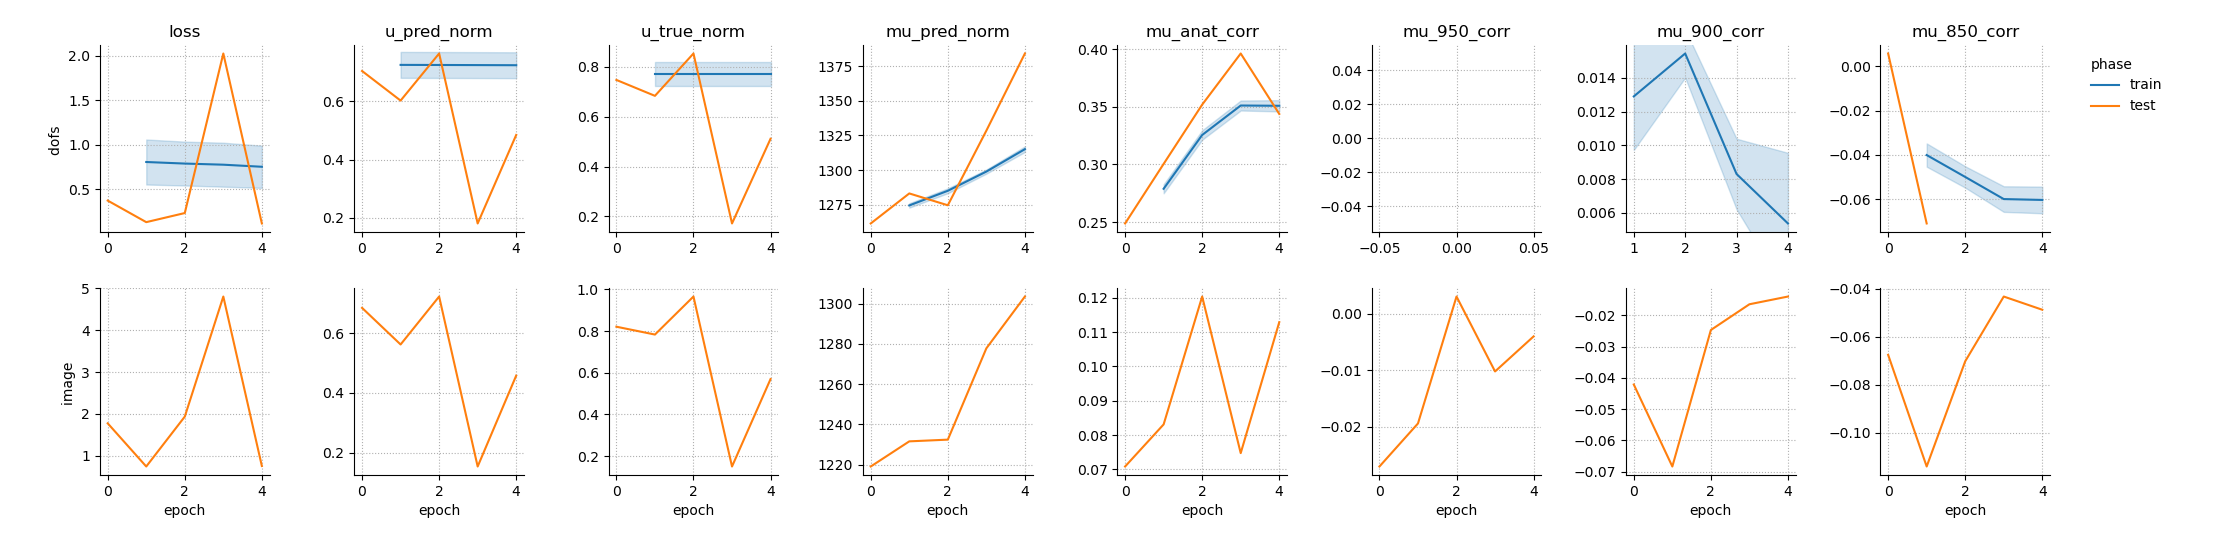

anat


<IPython.core.display.Javascript object>


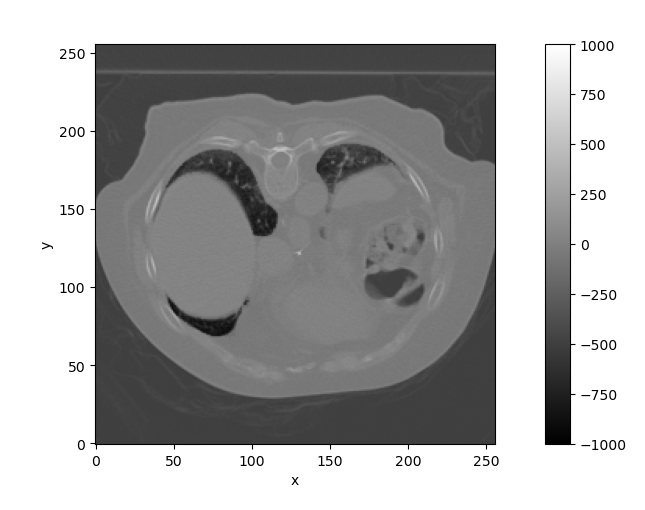

interactive(children=(SelectionSlider(description='z', options=((0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)…

emph


<IPython.core.display.Javascript object>


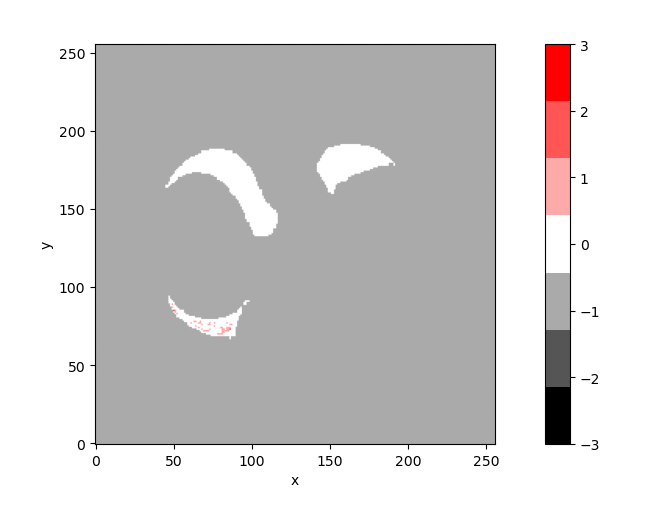

interactive(children=(SelectionSlider(description='z', options=((0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)…

mu_pred


<IPython.core.display.Javascript object>


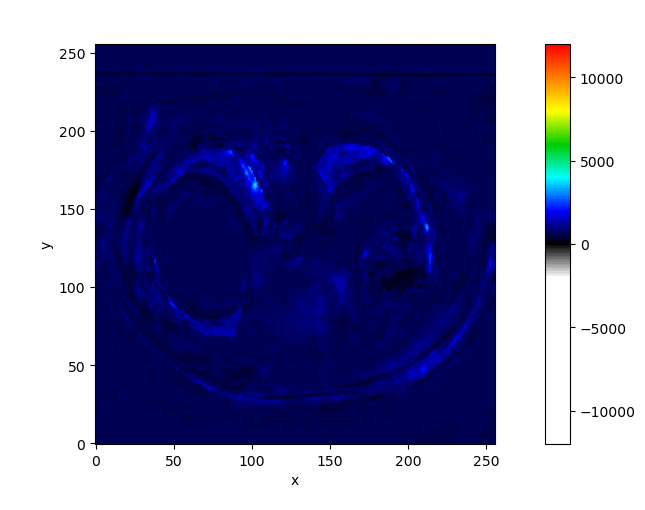

interactive(children=(SelectionSlider(description='z', options=((0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)…

u_pred


<IPython.core.display.Javascript object>


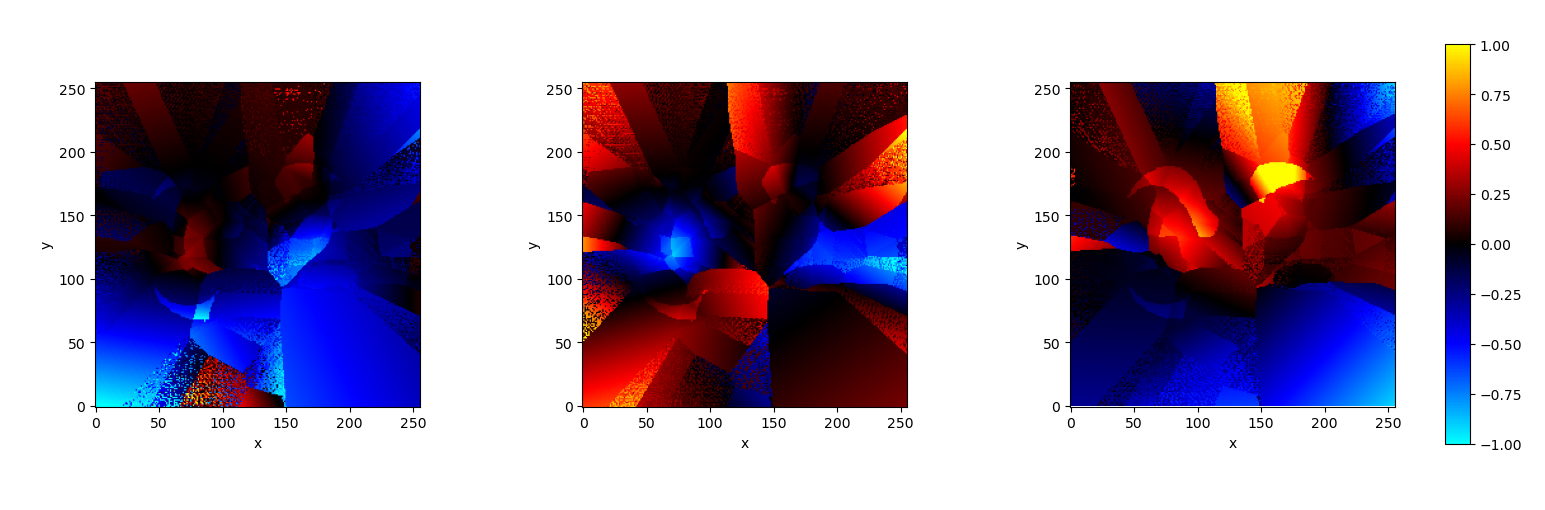

interactive(children=(SelectionSlider(description='z', options=((0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)…

u_true


<IPython.core.display.Javascript object>


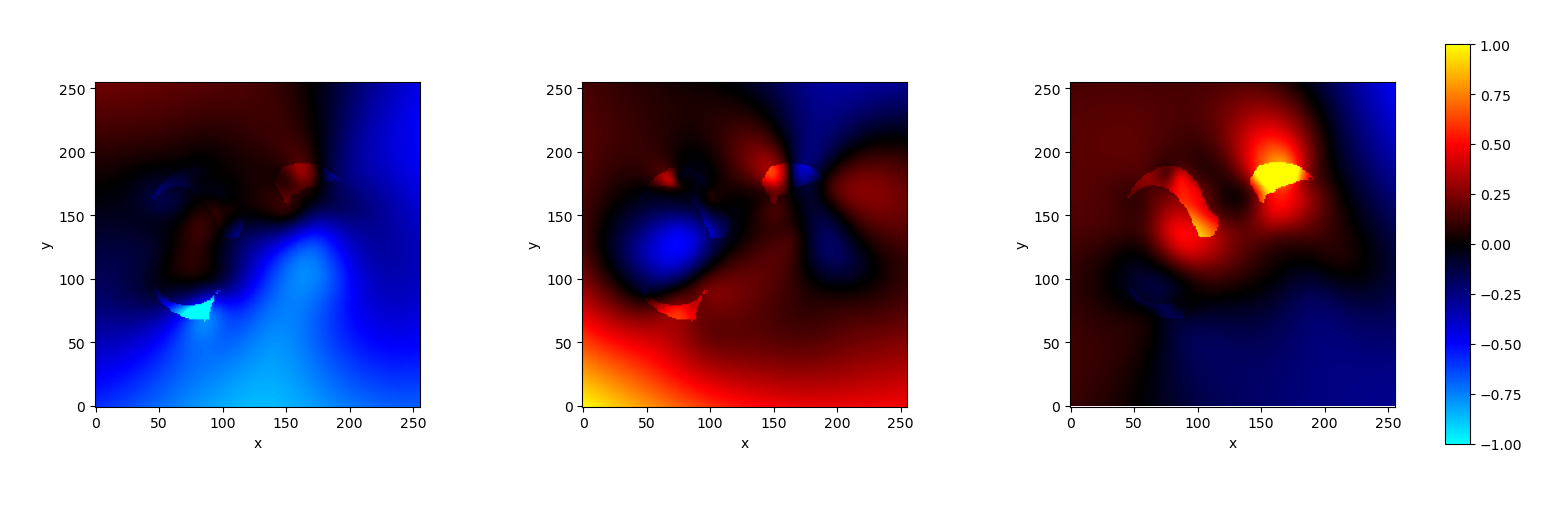

interactive(children=(SelectionSlider(description='z', options=((0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)…

0.3735
CPU times: user 1min 22s, sys: 1.25 s, total: 1min 23s
Wall time: 1min 21s


In [34]:
%%time
# test forward pass and initialize viewers
trainer.timer.start()
trainer.run_next_batch(phase='test', epoch=0)

In [35]:
trainer.save_metrics()
trainer.save_viewers()
trainer.save_state()

In [ ]:
%%time
trainer.timer.start()
trainer.train(num_epochs=100)

Training...
Epoch 1/100
Running train phase
['case10_T20.nii', 'case8_T50.nii', 'case8_T30.nii', 'case6_T80.nii']....1.1503
['case4_T70.nii', 'case1_T50.nii', 'case6_T10.nii', 'case2_T10.nii']....0.2808
['case9_T70.nii', 'case2_T70.nii', 'case5_T60.nii', 'case7_T90.nii']....0.3477
['case3_T40.nii', 'case8_T40.nii', 'case2_T60.nii', 'case1_T40.nii']....0.3025
['case8_T70.nii', 'case3_T80.nii', 'case5_T40.nii', 'case7_T10.nii']....0.3412
['case3_T20.nii', 'case4_T50.nii', 'case9_T80.nii', 'case4_T90.nii']....0.3590
['case6_T70.nii', 'case7_T30.nii', 'case5_T70.nii', 'case10_T40.nii']....0.2582
['case4_T80.nii', 'case9_T50.nii', 'case1_T30.nii', 'case2_T20.nii']....5.9916
['case9_T60.nii', 'case5_T90.nii', 'case7_T40.nii', 'case10_T70.nii']....0.6017
['case3_T50.nii', 'case10_T90.nii', 'case6_T30.nii', 'case1_T70.nii']....0.3953
['case3_T60.nii', 'case5_T30.nii', 'case10_T30.nii', 'case5_T20.nii']....0.5775
['case8_T60.nii', 'case1_T60.nii', 'case2_T50.nii', 'case4_T10.nii']....0.6422
['c

['case10_T30.nii', 'case1_T20.nii', 'case1_T30.nii', 'case10_T10.nii']....5.4636
['case7_T80.nii', 'case8_T30.nii', 'case4_T60.nii', 'case6_T60.nii']....1.4740
['case5_T60.nii', 'case8_T80.nii', 'case10_T70.nii', 'case3_T70.nii']....0.1059
['case4_T70.nii', 'case5_T10.nii']..0.1212
Loading ../data/Emory-4DCT/Case9Pack/NIFTI/case9_T00.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case9Pack/CorrField/case9_T10_T00.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case9Pack/TotalSegment/case9_T00/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case9Pack/pygalmesh/case9_T00_20.xdmf... 270
['case9_T00.nii'].0.1168
Epoch 5/100
Running train phase
['case8_T90.nii', 'case3_T60.nii', 'case3_T80.nii', 'case5_T90.nii']....0.5817
['case5_T50.nii', 'case10_T30.nii', 'case10_T90.nii', 'case1_T60.nii']....0.2176
['case7_T50.nii', 'case3_T10.nii', 'case10_T60.nii', 'case6_T40.nii']....0.4372
['case5_T40.nii', 'case10_T10.nii', 'case6_T10.nii', 'case7_T70.nii']....0.65

In [ ]:
trainer.evaluator.metrics

In [ ]:
trainer.timer.usage

In [ ]:
trainer.timer.usage.groupby(['phase', 'event']).mean().sort_values('time')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(trainer.timer.usage, y='event', x='time', hue='phase', estimator='mean', ax=ax)
ax.set_xlabel('time (s)')
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(trainer.timer.usage , y='event', x='time', hue='phase', estimator='sum', ax=ax)
#ax.set_xscale('log')
ax.set_xlabel('time (s)')
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(trainer.timer.usage, y='time', x='phase', estimator='mean', ax=ax)
ax.set_ylabel('time (s)')
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(trainer.timer.usage, y='time', x='phase', estimator='sum', ax=ax)
ax.set_ylabel('time (s)')
fig.tight_layout()

In [ ]:
test_data[0][-5].mean()